In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# Modelling
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder


In [2]:
categorical= pd.read_csv('categorical.csv')
numerical= pd.read_csv('numerical.csv')
target= pd.read_csv('target.csv')


In [3]:
## check cat types 

categorical.dtypes


STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [4]:
categorical = categorical.astype(object)

all_data = pd.concat([numerical, categorical, target], axis=1)



In [5]:
X = all_data.drop(['TARGET_B'], axis = 1)
y = all_data['TARGET_B']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [7]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

In [8]:
#Usage of MinMax Scaler
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [9]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=list(X_train_num.columns))
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=list(X_test_num.columns))

In [10]:
#Usage of One-Hot Encoding
encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train_cat)
all_columns = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns=all_columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns=all_columns)

C:\Users\adyto\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [11]:
X_train = pd.concat((X_train_num_scaled,X_train_cat_encode),axis=1)
X_test = pd.concat((X_test_num_scaled,X_test_cat_encode),axis=1)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20
                             )
clf.fit(X_train, y_train)
print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.94877438457205
TestSet =  0.9511083163024682


In [13]:
y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))


0    18150
1      933
Name: TARGET_B, dtype: int64

array([[18150,     0],
       [  933,     0]], dtype=int64)

In [14]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [15]:
### oversample 

In [16]:
trainset = pd.concat([X_train, y_train], axis=1)


In [17]:
# separate majority/minority classes
category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

In [18]:
from sklearn.utils import resample
category_1_oversampled = resample(category_1, 
                                    replace=True,            
                                    n_samples = len(category_0)) 

In [19]:
### checking shape 

print(category_1_oversampled.shape)
print(category_0.shape)

(72419, 633)
(72419, 633)


In [20]:
train_oversampled = pd.concat([category_1_oversampled, category_0], axis=0)


In [21]:
trainset_new = train_oversampled.sample(frac =1)


In [22]:
trainset_new["TARGET_D"]

8137     0.000
9138     0.125
39952    0.250
70949    0.000
1555     0.125
         ...  
52755    0.080
53860    0.250
9822     0.075
43379    0.000
58466    0.000
Name: TARGET_D, Length: 144838, dtype: float64

In [23]:
X_train = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target d from the set of features
X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [24]:
#Usage of MinMax Scaler
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=list(X_train_num.columns))
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=list(X_test_num.columns))

#Usage of One-Hot Encoding
encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train_cat)
all_columns = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns=all_columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns=all_columns)

C:\Users\adyto\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [25]:
X_train = pd.concat((X_train_num_scaled,X_train_cat_encode),axis=1)
X_test = pd.concat((X_test_num_scaled,X_test_cat_encode),axis=1)

In [26]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [27]:
train_oversampled = pd.concat([category_1_oversampled, category_0], axis=0)

trainset_new = train_oversampled.sample(frac =1)



In [28]:
X_train = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target d from the set of features
X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [29]:
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.2) # fraction of X-train to use in each tree
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6225576160952236
0.6144212125976


0    18150
1      933
Name: TARGET_B, dtype: int64

array([[11215,  6935],
       [  423,   510]], dtype=int64)

In [30]:
from sklearn.model_selection import cross_val_score

# For cross validation
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(np.mean(cross_val_scores))

0.6194437769165985


In [31]:
cross_val_scores


array([0.61871721, 0.61906241, 0.62279067, 0.61411261, 0.62253599])

# \\ Use Feature Selections  (Variance Threshold, RFE, PCA, etc.)


SelectKBest

In [32]:
X = numerical
y = target['TARGET_B']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(chi2, k=20).fit(X, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = X.columns
# Sorting data
print(df.sort_values(by = ['score'], ascending = False).head(20))




             score    Column
311  527716.426176  CONTROLN
140  187983.976667       IC5
83    49855.611718       HV1
84    49561.067003       HV2
0     39087.069814     TCODE
133   26891.429352       MSA
13    17167.230879    POP901
137    2921.367106       IC2
14     2811.233301    POP902
303    2756.199364  RAMNTALL
139    2751.447661       IC4
110    2620.983688      HVP1
111    2549.991693      HVP2
136    2448.754088       IC1
138    2415.716681       IC3
15     2166.139007    POP903
112    2132.962948      HVP3
115    1906.878033      HVP6
304    1883.560588  NGIFTALL
113    1472.531558      HVP4


In [33]:
numerical_selected_list = ['CONTROLN', 'IC5', 'HV1', 'TCODE', 'MSA', 'POP901', 'RAMNTALL', 'HVP1', 'NGIFTALL']


In [34]:
numerical_kbest = numerical[numerical_selected_list].copy()


In [35]:
numerical_kbest


,CONTROLN,IC5,HV1,TCODE,MSA,POP901,RAMNTALL,HVP1,NGIFTALL
0,95515,12883,479,0,0.0,992,240.0,2,31
1,148535,36175,5468,1,4480.0,3611,47.0,97,3
2,15078,11576,497,1,0.0,7001,202.0,0,27
3,172556,15130,1000,0,9340.0,640,109.0,10,16
4,7112,9836,576,0,5000.0,2520,254.0,0,37
...,...,...,...,...,...,...,...,...,...
95407,184568,18807,988,1,380.0,27380,25.0,2,1
95408,122706,26538,1679,1,3360.0,1254,20.0,18,1
95409,189641,12178,376,1,4040.0,552,58.0,0,7
95410,4693,15948,2421,0,8735.0,1746,498.0,89,41


In [36]:
all_data_kbest = pd.concat([numerical_kbest, target], axis=1)


In [37]:
X_kbest = all_data_kbest.drop(['TARGET_B'], axis = 1)
y_kbest = all_data_kbest['TARGET_B']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y_kbest, test_size=0.25)

#Usage of MinMax Scaler
scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=list(X_train.columns))
X_test_scaled = pd.DataFrame(X_test_scaled, columns=list(X_test.columns))

y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

trainset = pd.concat([X_train_scaled, y_train], axis=1)

In [39]:
# separate majority/minority classes
category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

from sklearn.utils import resample
category_1_oversampled = resample(category_1, 
                                    replace=True,            
                                    n_samples = len(category_0))  


In [40]:

train_oversampled = pd.concat([category_1_oversampled, category_0], axis=0)

trainset_new = train_oversampled.sample(frac =1)


In [41]:
# To check the scores
model = SelectKBest(chi2, k=10).fit(X, y)
df['Column'] = numerical.columns


In [42]:
print(category_0.shape)
print(category_1.shape)
print(category_1_oversampled.shape)
print(train_oversampled.shape)
print(trainset_new.shape)
## checking for balance 

(67931, 11)
(3628, 11)
(67931, 11)
(135862, 11)
(135862, 11)


In [43]:
X_train = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B'].reset_index()
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target d from the set of features
X_train = X_train.drop(['TARGET_D'], axis = 1).reset_index()
X_test = X_test.drop(['TARGET_D'], axis = 1).reset_index()

## dropping target d and separating as needed 


In [44]:
clf_kbest = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20) # ultimate answer based on at least this many rows
                                                    # fraction of X-train to use in each tree
clf_kbest.fit(X_train, y_train)
print(clf_kbest.score(X_train, y_train))
print(clf_kbest.score(X_test, y_test))

y_pred = clf_kbest.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

### using the RandomForestClassifier

### didnt work therefor at this time will wait to ask TA 

KeyboardInterrupt: 

In [45]:
# For cross validation
clf_kbest = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
cross_val_scores = cross_val_score(clf_kbest, X_train, y_train, cv=5)
print(np.mean(cross_val_scores))

### checking cross val 

KeyboardInterrupt: 

In [ ]:
### VarianceThreshold

In [46]:
from sklearn.feature_selection import VarianceThreshold


X = all_data.drop(['TARGET_B'], axis = 1)
y = all_data['TARGET_B']

In [47]:
np.var(np.random.random(size=X.shape[1]))



0.08108920963084307

In [48]:
X['low_variance'] = 1
X['low_variance2'] = (np.random.random(size=X.shape[0]) > 0.5) * 1



In [49]:
X

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D,low_variance,low_variance2
0,0,60.000000,5,9,0,0,39,34,18,10,...,8,94,2,95,12,89,11,0.0,1,0
1,1,46.000000,6,9,16,0,15,55,11,6,...,10,95,12,95,12,93,10,0.0,1,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,11,92,7,95,12,90,1,0.0,1,1
3,0,70.000000,1,4,2,0,23,14,31,3,...,11,94,11,95,12,87,2,0.0,1,0
4,0,78.000000,3,2,60,1,28,9,53,26,...,10,96,1,96,1,79,3,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,2,96,2,96,2,96,2,0.0,1,1
95408,1,48.000000,7,9,1,0,31,43,19,4,...,3,96,3,96,3,96,3,0.0,1,1
95409,1,60.000000,5,9,0,0,18,46,20,7,...,3,95,1,96,10,94,10,0.0,1,1
95410,0,58.000000,7,9,0,0,28,35,20,9,...,11,96,8,97,1,86,12,18.0,1,1


In [50]:
X_num = X.select_dtypes(np.number)
X_cat = X.select_dtypes(object)



In [51]:
encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train_cat)
all_columns = encoder.get_feature_names_out(input_features=X_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(), columns=all_columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(), columns=all_columns)

C:\Users\adyto\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\adyto\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [52]:
X_test = pd.concat((X_num,X_test_cat_encode),axis=1)


In [53]:
variance_threshold = 0.1
selection = VarianceThreshold(threshold=variance_threshold)



In [54]:
selection.fit(X_test)




VarianceThreshold(threshold=0.1)

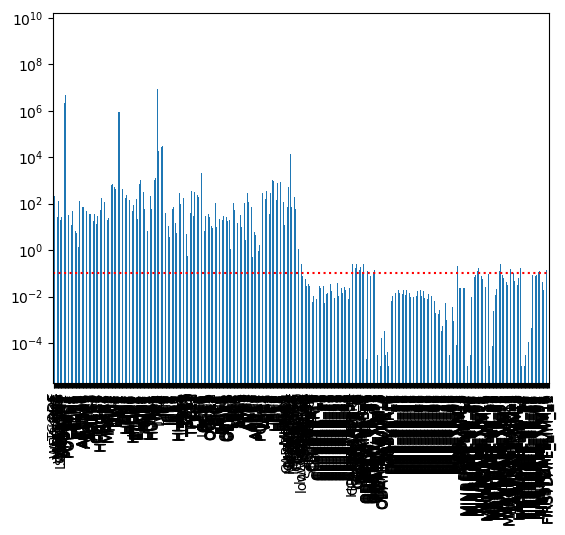

In [55]:
ax = pd.Series(selection.variances_, index=X_test.columns).plot(kind='bar', logy=True);
ax.axhline(variance_threshold, ls='dotted', c='r');

In [56]:
X_selected = pd.DataFrame(selection.transform(X_test), columns=X_test.columns[selection.get_support()])
X_selected.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MAXRDATE_MM_12,LASTDATE_YR_96,LASTDATE_MM_2,LASTDATE_MM_3,LASTDATE_MM_12,FIRSTDATE_YR_94,FIRSTDATE_YR_95,FIRSTDATE_MM_2,FIRSTDATE_MM_9,FIRSTDATE_MM_10
0,0.0,60.000000,5.0,9.0,0.0,0.0,39.0,34.0,18.0,10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,46.000000,6.0,9.0,16.0,0.0,15.0,55.0,11.0,6.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,61.611649,3.0,1.0,2.0,0.0,20.0,29.0,33.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,70.000000,1.0,4.0,2.0,0.0,23.0,14.0,31.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,78.000000,3.0,2.0,60.0,1.0,28.0,9.0,53.0,26.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
X_selected_list=X_selected.columns

In [58]:
X_selected_list

Index(['TCODE', 'AGE', 'INCOME', 'WEALTH1', 'HIT', 'MALEMILI', 'MALEVET',
       'VIETVETS', 'WWIIVETS', 'LOCALGOV',
       ...
       'MAXRDATE_MM_12', 'LASTDATE_YR_96', 'LASTDATE_MM_2', 'LASTDATE_MM_3',
       'LASTDATE_MM_12', 'FIRSTDATE_YR_94', 'FIRSTDATE_YR_95',
       'FIRSTDATE_MM_2', 'FIRSTDATE_MM_9', 'FIRSTDATE_MM_10'],
      dtype='object', length=355)

# final Lab

In [59]:
donated_all = pd.concat([all_data, target], axis = 1)


In [60]:
donated_num = donated.select_dtypes(np.number)
donated_cat = donated.select_dtypes(object)

##sparate data 

In [62]:
donated_num = donated_num.drop(['TARGET_B', 'TARGET_D'], axis = 1)

## drop TARGET_B,TARGET_D

In [ ]:
## Apply RFE for feature selection onyly on Num

In [63]:
X = donated_num
y = donated['TARGET_D']

from sklearn.feature_selection import RFE
from sklearn import linear_model
lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=25, verbose=False)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=25, verbose=False)

In [64]:
# checking labels the top features as 1 
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = pd.DataFrame(donated_num).columns
df[df['Rank']<26]
#df['Rank'].value_counts()

,Rank,Column_name
16,1,POP90C1
17,1,POP90C2
18,1,POP90C3
19,24,POP90C4
20,23,POP90C5
21,1,ETH1
22,1,ETH2
25,1,ETH5
33,1,ETH13
34,1,ETH14


In [65]:
numerical_features_selected = ['POP90C1', 'ETH1', 'HHN2', 'DW9', 'HU2', 'HHD1', 'ETHC1', 'HUPA7', 'MC1', 'TPE7', 'ANC15', 
                              'HC15', 'MINRAMNT', 'LASTGIFT', 'AVGGIFT', 'RFA_2F']

## taking every column that does not have dup start 

In [66]:
donated_num_feat_RFE = donated_num[numerical_features_selected].copy()
## selecting the wanted columns 

In [67]:
donated_num_feat_RFE


,POP90C1,ETH1,HHN2,DW9,HU2,HHD1,ETHC1,HUPA7,MC1,TPE7,ANC15,HC15,MINRAMNT,LASTGIFT,AVGGIFT,RFA_2F
20,99,97,30,0,12,42,21,0,61,0,0,0,2.00,5.0,4.066667,3
30,99,94,23,0,3,63,30,0,74,0,0,0,2.00,7.0,6.181818,3
45,89,99,43,0,4,27,16,0,61,0,1,0,3.00,5.0,4.857143,3
78,99,97,44,0,37,18,11,0,55,0,0,0,5.00,10.0,11.000000,2
93,99,7,21,0,11,55,0,0,39,0,0,0,5.00,12.0,9.400000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,0,94,37,0,43,28,18,0,60,0,0,0,0.07,17.0,7.935667,1
95309,99,90,36,1,28,42,22,0,86,0,0,0,5.00,15.0,11.666667,1
95398,99,85,33,0,25,29,14,0,32,0,0,0,5.00,20.0,14.400000,3
95403,0,99,30,0,21,45,28,2,38,0,0,0,3.00,20.0,11.583333,1


In [68]:

X_RFE = donated_num_feat_RFE
y_RFE = donated['TARGET_D']

### train test spliting 
X_train, X_test, y_train, y_test = train_test_split(X_RFE, y_RFE, test_size=0.25)

#Usage of MinMax Scaler
scaler = MinMaxScaler().fit(X_train)

## scaling the train and test 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## creating new DF for the scaled data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=list(X_train.columns))
X_test_scaled = pd.DataFrame(X_test_scaled, columns=list(X_test.columns))

X_train = X_train_scaled
X_test = X_test_scaled

y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [69]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10,
                             criterion = 'squared_error',
                             min_samples_split=10,
                             min_samples_leaf = 10)
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)

0.6221702324923188
0.471625166241907


In [70]:
y_pred
###  prediction of how much each person will donate 

array([ 9.80788629, 18.36342129, 10.58331999, ...,  7.57989032,
       17.38468887,  5.31436976])